In [8]:
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.svm import SVC 
from sklearn.cluster import SpectralClustering 
from sklearn.metrics import normalized_mutual_info_score
from qiskit import BasicAer 
from qiskit.circuit. library import ZZFeatureMap 
from qiskit.utils import QuantumInstance, algorithm_globals 
from qiskit_machine_learning.algorithms import QSVC 
from qiskit_machine_learning. kernels import QuantumKernel 
from qiskit_machine_learning.datasets import ad_hoc_data

In [9]:
seed = 12345
algorithm_globals.random_seed = seed

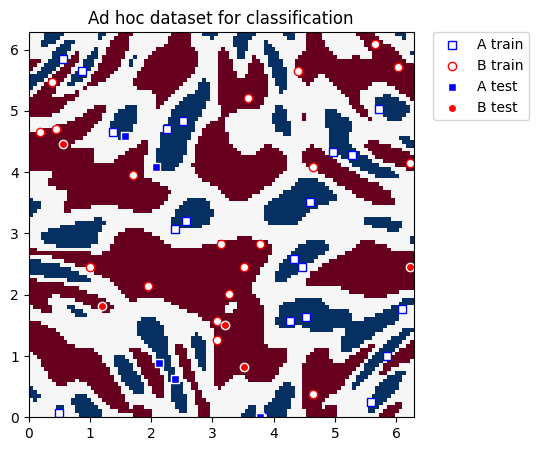

In [13]:
adhoc_dimension = 2 
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=20, 
    test_size=5, 
    n=adhoc_dimension, 
    gap=0.3, plot_data=False, 
    one_hot=False, include_sample_total=True
)

plt.figure(figsize=(5, 5)) 
plt.ylim(0, 2 * np.pi) 
plt.xlim(0, 2 * np.pi) 
plt.imshow (np.asmatrix(adhoc_total).T, interpolation='nearest',
    origin='lower', cmap='RdBu', extent=[0, 2 * np.pi, 0, 2 * np.pi])

plt.scatter(train_features[np.where(train_labels[:] == 0), 0], train_features [ np.where(train_labels[:] == 0), 1],
    marker='s', facecolors='w', edgecolors='b', label="A train") 

plt.scatter(train_features[np.where(train_labels[:] == 1), 0], train_features [ np.where(train_labels[:] == 1), 1],
    marker='o', facecolors='w', edgecolors='r', label="B train") 

plt.scatter(test_features [np.where(test_labels[:] == 0), 0], test_features[np.where(test_labels[:] == 0), 1],
    marker='s', facecolors='b', edgecolors='w', label="A test") 

plt.scatter(test_features [np.where(test_labels[:] == 1), 0], test_features [ np.where(test_labels[:] == 1), 1],
    marker='o', facecolors='r', edgecolors='w', label="B test")

plt. legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) 
plt.title("Ad hoc dataset for classification")
plt.show()

In [14]:
adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension,
    reps=2, entanglement='linear')

adhoc_backend = QuantumInstance(BasicAer.get_backend('qasm_simulator'), shots=1024,
    seed_simulator=seed, seed_transpiler=seed)

adhoc_kernel = QuantumKernel(feature_map=adhoc_feature_map, quantum_instance=adhoc_backend)

In [15]:
adhoc_svc = SVC (kernel=adhoc_kernel.evaluate)
adhoc_svc.fit(train_features, train_labels)
adhoc_score = adhoc_svc.score (test_features, test_labels)

print (f'Callable kernel classification test score: {adhoc_score}')

Callable kernel classification test score: 1.0


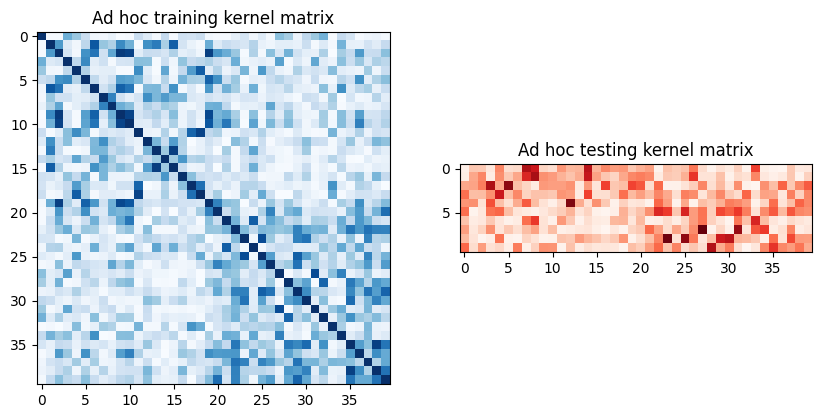

In [19]:
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features) 
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, 
                                            y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5)) 

axs[0].imshow(np.asmatrix(adhoc_matrix_train), 
            interpolation='nearest', origin='upper', cmap='Blues') 
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), 
            interpolation='nearest', origin='upper', cmap='Reds') 
axs[1].set_title("Ad hoc testing kernel matrix") 

plt.show()

adhoc_SVC = SVC(kernel='precomputed') 
adhoc_svc.fit(adhoc_matrix_train, train_labels) 
adhoc_score = adhoc_svc.score(adhoc_matrix_test, test_labels)
print(f'Precomputed kernel classification test score: {adhoc_score}')